# Shapiro test for normality check

In [1]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# applying the shqapiro test for getting p and stat value 
from scipy.stats import shapiro
data = [1.822,0,553,0.121,-0.055,-1.421,0.781,-1.442]
shapiro(data)

ShapiroResult(statistic=0.423489511013031, pvalue=1.2099036439394695e-06)

In [7]:
from scipy.stats import shapiro
data = [1.822,0,553,0.121,-0.055,-1.421,0.781,-1.442]
stat,p = shapiro(data)
print("stat = ",stat)
print("p = ",p)
if p > 0.05:
    print("Data is normal or probably gaussian")
else:
     print("Data is not normal or probably is not gaussian")

stat =  0.423489511013031
p =  1.2099036439394695e-06
Data is not normal or probably is not gaussian


<Axes: >

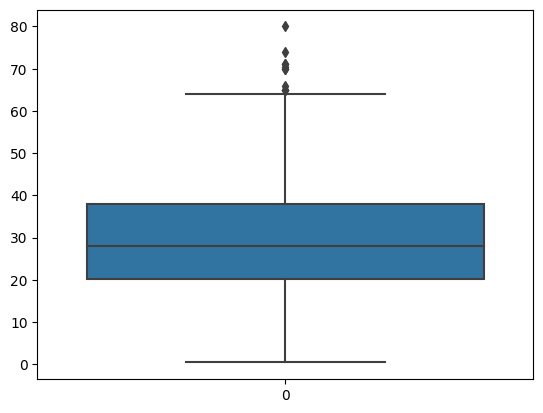

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ship = sns.load_dataset("titanic")
# ship['age'].hist()
sns.boxplot(ship['age'])

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
ship = sns.load_dataset("titanic")
stat,p = shapiro(ship['age'])
print("stat = ",stat)
print("p = ",p)
if p > 0.05:
    print("Data is normal or probably gaussian")
else:
     print("Data is not normal or probably is not gaussian")

stat =  nan
p =  1.0
Data is normal or probably gaussian


In [23]:
# dropping all outliers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
ship = sns.load_dataset("titanic")
ship.isnull().sum()
# stat,p = shapiro(ship['age'])
# print("stat = ",stat)
# print("p = ",p)
# if p > 0.05:
#     print("Data is normal or probably gaussian")
# else:
#      print("Data is not normal or probably is not gaussian")

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

stat =  0.9906663298606873
p =  0.28415897488594055
Data is normal or probably gaussian


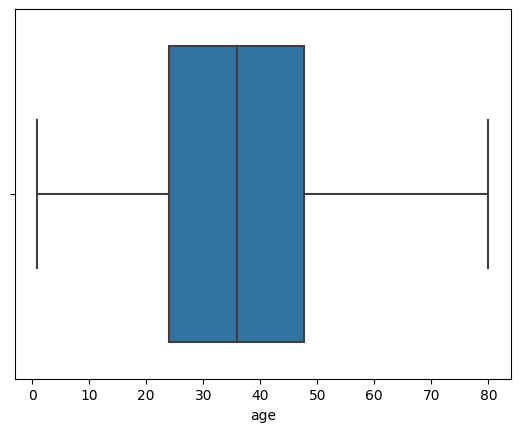

In [42]:
# dropping all outliers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
ship = sns.load_dataset("titanic")
ship.isnull().sum()
s1 = ship.dropna()

sns.boxplot(x=s1['age'])
stat,p = shapiro(s1['age'])
print("stat = ",stat)
print("p = ",p)
if p > 0.05:
    print("Data is normal or probably gaussian")
else:
     print("Data is not normal or probably is not gaussian")

In [49]:
# now checking for the fare in titanic data
stat,p = shapiro(s1['fare'])
print("stat = ",stat)
print("p = ",p)
if p > 0.05:
    print("Data is normal or probably gaussian")
else:
     print("Data is not normal or probably is not gaussian")

stat =  0.7430529594421387
p =  1.6486953687823121e-16
Data is not normal or probably is not gaussian


# 02 Correlation
- H0: The two samples are independent
- H1: There is a dependency between the samples
  ## pearson's correlation co-efficient

In [62]:
from scipy.stats import spearmanr 
data1 = [1.822,0,553,0.121,-0.055,-1.421,0.781,-1.442]
data2 = [0.822,1,553,1.121,-1.055,-0.421,0.781,-0.442]
stat, p = spearmanr(data1,data2)
print("stat = ",(stat),"\np = ",(p))
if p > 0.05:
    print('probably independent')
else:
    print('probably dependent(correlation exists)')
        


stat =  0.7380952380952381 
p =  0.03655276105286081
probably dependent(correlation exists)


In [66]:
# applying on titanic data
from scipy.stats import pearsonr 
data1 = s1['age']
data2 = s1['fare']
stat, p = pearsonr(data1,data2)
print("stat = ",(stat),"\np = ",(p))
if p > 0.05:
    print('probably independent')
else:
    print('probably dependent(correlation exists)')
        


stat =  -0.09073036394094937 
p =  0.22318591625857073
probably independent


## spearmanr correlation

In [67]:
# applying on titanic data
from scipy.stats import spearmanr 
data1 = s1['age']
data2 = s1['fare']
stat, p = spearmanr(data1,data2)
print("stat = ",(stat),"\np = ",(p))
if p > 0.05:
    print('probably independent')
else:
    print('probably dependent(correlation exists)')
        


stat =  -0.07258447372826443 
p =  0.33017748068844077
probably independent


# 03- Chi-Squared
Observations are used in calculation of the contigency table's are independent.Used categorical variables in this Statistical test
- H0: The two samples are independent
- H1: There is a dependency between the samples

In [70]:
from scipy.stats import chi2_contingency
table = [[10,20,30],[6,9,17]]
stat,p,dof,expected = chi2_contingency(table)
print("stat = ",(stat),"\np = ",(p))
if p > 0.05:
      print('probably independent')
else:
    print('probably dependent')
        


stat =  0.27157465150403504 
p =  0.873028283380073
probably independent


# Parametric statistical hypothesis Test
1. Student's T-Test   
   
   Test's whether the means of two independent samples are different
   - H0:The means of two samples are equal
   - H1:The means of two samples are unequal
    

In [72]:
from scipy.stats import ttest_ind
data1 = [1.822,0,553,0.121,-0.055,-1.421,0.781,-1.442]
data2 = [0.822,1,553,1.121,-1.055,-0.421,0.781,-0.442]
stat, p = ttest_ind(data1,data2)
print("stat = ",(stat),"\np = ",(p))
if p > 0.05:
    print('probably same distribution')
else:
    print('probably different distribution')
        


stat =  -0.0025578505881338367 
p =  0.9979952232236613
probably same distribution


2.  Paired student's T-Test
   - both variable have must same length

In [73]:
from scipy.stats import ttest_rel
data1 = [1.822,0,553,0.121,-0.055,-1.421,0.781,-1.442]
data2 = [0.822,1,553,1.121,-1.055,-0.421,0.781,-0.442]
stat, p = ttest_rel(data1,data2)
print("stat = ",(stat),"\np = ",(p))
if p > 0.05:
    print('probably same distribution')
else:
    print('probably different distribution')
        


stat =  -0.7977240352174657 
p =  0.4512388720016779
probably same distribution


# 04-Anova
- H0:the means of samples are equal
- one or more of means of samples are unequal
 - ## one way Anova

In [74]:
from scipy.stats import f_oneway
data1 = [1.822,0,553,0.121,-0.055,-1.421,0.781,-1.442]
data2 = [0.822,1,553,1.121,-1.055,-0.421,0.781,-0.442]
data3 = [0.952,1,593,1.151,-1.095,-0.451,0.751,-0.452]
stat, p = f_oneway(data1,data2,data3)
print("stat = ",(stat),"\np = ",(p))
if p > 0.05:
    print('probably same distribution')
else:
    print('probably different distribution')
        


stat =  0.0017534755833787717 
p =  0.9982482069971712
probably same distribution


In [76]:
# appyling on the titanic data
from scipy.stats import f_oneway
data1 = s1['age']
data2 = s1['fare']
data3 = s1['survived']
stat, p = f_oneway(data1,data2,data3)
print("stat = ",(stat),"\np = ",(p))
if p > 0.05:
    print('probably same distribution')
else:
    print('probably different distribution')
        


stat =  137.59008141055892 
p =  4.567357442512319e-49
probably different distribution
